This uses the Yahoo Finance API via the yfinance library.

✅ What it does

It downloads historical stock market data for the given company (ticker symbol).
Example:

"AAPL" → Apple Inc.

"GOOG" → Google

"RELIANCE.NS" → Reliance Industries (India NSE)

✅ What it returns

A Pandas DataFrame with columns:

Date, Open, High, Low, Close, Adj Close, Volume


Each row = one trading day.

🔍 Part 2: data[['Open','High','Low','Close','Volume']]

We’re selecting only useful features for model training.

Column	Meaning	Why It’s Used
Open	Price when market opened	helps track trend
High	Highest price that day	volatility info
Low	Lowest price that day	volatility info
Close	Price when market closed	target for prediction
Volume	Number of shares traded	market activity indicator

➡️ These 5 features are enough to capture stock movement patterns for ML models like LSTM and XGBoost.

🧠 How to Know What to Download

You decide based on what you want to predict:

Goal	What to Download	Example
Predict stock price trend	Open, High, Low, Close, Volume	✅ (what we did)
Predict returns or volatility	Add Adj Close, compute % change	For risk modeling
Multi-stock correlation	Download multiple tickers	Compare AAPL vs MSFT
Intraday trading	Use minute/hour interval	interval="1h"


In [ ]:
!pip install yfinance scikit-learn xgboost tensorflow joblib
import yfinance as yf
import pandas as pd, numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib


In [ ]:
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
data = yf.download(tickers, start="2019-01-01", end="2024-12-31")
data.columns


/tmp/ipython-input-2932774311.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  5 of 5 completed


MultiIndex([( 'Close',  'AAPL'),
            ( 'Close',  'AMZN'),
            ( 'Close', 'GOOGL'),
            ( 'Close',  'MSFT'),
            ( 'Close',  'TSLA'),
            (  'High',  'AAPL'),
            (  'High',  'AMZN'),
            (  'High', 'GOOGL'),
            (  'High',  'MSFT'),
            (  'High',  'TSLA'),
            (   'Low',  'AAPL'),
            (   'Low',  'AMZN'),
            (   'Low', 'GOOGL'),
            (   'Low',  'MSFT'),
            (   'Low',  'TSLA'),
            (  'Open',  'AAPL'),
            (  'Open',  'AMZN'),
            (  'Open', 'GOOGL'),
            (  'Open',  'MSFT'),
            (  'Open',  'TSLA'),
            ('Volume',  'AAPL'),
            ('Volume',  'AMZN'),
            ('Volume', 'GOOGL'),
            ('Volume',  'MSFT'),
            ('Volume',  'TSLA')],
           names=['Price', 'Ticker'])

In [ ]:
# simplify column add multiIndex
data.columns = ['_'.join(col).strip() for col in data.columns.values]
data.head()


,Close_AAPL,Close_AMZN,Close_GOOGL,Close_MSFT,Close_TSLA,High_AAPL,High_AMZN,High_GOOGL,High_MSFT,High_TSLA,...,Open_AAPL,Open_AMZN,Open_GOOGL,Open_MSFT,Open_TSLA,Volume_AAPL,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_TSLA
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,37.575207,76.956497,52.372787,94.789673,20.674667,37.796491,77.667999,52.676195,95.380231,21.008667,...,36.854254,73.260002,51.008198,93.317959,20.406668,148158800,159662000,31868000,35329300,174879000
2019-01-03,33.832447,75.014000,50.922283,91.302574,20.024000,34.672369,76.900002,52.947814,93.917916,20.626667,...,34.258355,76.000504,52.173654,93.833546,20.466667,365248800,139512000,41960000,42579100,104478000
2019-01-04,35.276726,78.769501,53.534267,95.548981,21.179333,35.345730,79.699997,53.630107,96.092673,21.200001,...,34.389217,76.500000,51.770928,93.477332,20.400000,234428400,183652000,46022000,44060600,110911500
2019-01-07,35.198204,81.475502,53.427505,95.670837,22.330667,35.412351,81.727997,53.764180,96.805088,22.449333,...,35.381418,80.115501,53.678275,95.277132,21.448000,219111200,159864000,47446000,35656100,113268000
2019-01-08,35.869179,82.829002,53.896770,96.364517,22.356667,36.123774,83.830498,54.293036,97.461271,22.934000,...,35.586032,83.234497,53.928053,96.589491,22.797333,164101200,177628000,35414000,31514400,105127500


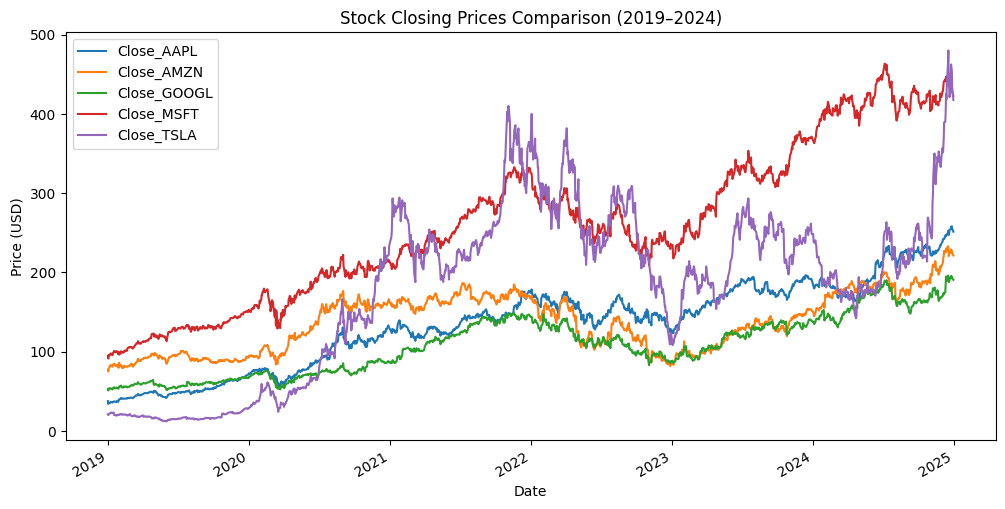

In [ ]:
#Compare and analyse
import matplotlib.pyplot as plt

close_cols = [col for col in data.columns if "Close" in col]
data[close_cols].plot(figsize=(12,6))
plt.title("Stock Closing Prices Comparison (2019–2024)")
plt.ylabel("Price (USD)")
plt.show()


Scenario	feature_cols
Single stock (AAPL)	['Open', 'High', 'Low', 'Close', 'Volume']
Multi-stock (AAPL, MSFT, TSLA...)	['Open_AAPL', 'Close_MSFT', ...]
Technical indicators added (advanced)	Add columns like 'SMA_20', 'RSI', 'MACD'
With external features (news, sentiment, etc.)	Include text/sentiment scores too

In [ ]:
feature_cols = [col for col in data.columns if "Close" not in col]
target_cols = [col for col in data.columns if "Close" in col]

In [ ]:
print("Feature Columns:", feature_cols[:10])
print("Target Columns:", target_cols)

Feature Columns: ['High_AAPL', 'High_AMZN', 'High_GOOGL', 'High_MSFT', 'High_TSLA', 'Low_AAPL', 'Low_AMZN', 'Low_GOOGL', 'Low_MSFT', 'Low_TSLA']
Target Columns: ['Close_AAPL', 'Close_AMZN', 'Close_GOOGL', 'Close_MSFT', 'Close_TSLA']


In [ ]:
import joblib

joblib.dump(feature_cols, 'feature_cols.joblib')


['feature_cols.joblib']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Handle missing values
data = data.dropna()

# Initialize scaler
scaler = MinMaxScaler()

# Fit-transform features
scaled_features = scaler.fit_transform(data[feature_cols])

# Convert back to DataFrame
X_scaled = pd.DataFrame(scaled_features, columns=feature_cols, index=data.index)

# Dump scaler and feature columns for later use
import joblib

joblib.dump(scaler, "scaler.joblib")

print("✅ scaler.joblib and feature_cols.joblib saved!")


✅ scaler.joblib and feature_cols.joblib saved!


In [ ]:
from xgboost import XGBRegressor

for ticker in tickers:
    print(f"\n🚀 Training model for {ticker} ...")

    target = f"Close_{ticker}"   # target column
    X = X_scaled
    y = data[target]

    model = XGBRegressor(
        n_estimators=250,
        learning_rate=0.05,
        max_depth=6,
        random_state=42
    )
    model.fit(X, y)

    # Save model
    model_filename = f"xgb_model_{ticker}.joblib"
    joblib.dump(model, model_filename)
    print(f"✅ Saved {model_filename}")


🚀 Training model for AAPL ...
✅ Saved xgb_model_AAPL.joblib

🚀 Training model for MSFT ...
✅ Saved xgb_model_MSFT.joblib

🚀 Training model for GOOGL ...
✅ Saved xgb_model_GOOGL.joblib

🚀 Training model for AMZN ...
✅ Saved xgb_model_AMZN.joblib

🚀 Training model for TSLA ...
✅ Saved xgb_model_TSLA.joblib


In [ ]:
from google.colab import files

files.download("feature_cols.joblib")
files.download("scaler.joblib")
for ticker in tickers:
    files.download(f"xgb_model_{ticker}.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib
import os

In [ ]:
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
MODELS_DIR = "./models_lstm/"
os.makedirs(MODELS_DIR, exist_ok=True)
SEQ_LEN = 60
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, 3])  # Close price
    return np.array(X), np.array(y)

# -----------------------------
# LOOP THROUGH STOCKS
# -----------------------------
for ticker in tickers:
    print(f"\n🚀 Training LSTM for {ticker} ...")

    # Download stock data
    df = yf.download(ticker, start="2019-01-01", end="2024-12-31")
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    df.dropna(inplace=True)

    # Scale data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)

    # Save scaler for this stock
    joblib.dump(scaler, os.path.join(MODELS_DIR, f"scaler_{ticker}.joblib"))

    # Create sequences
    X, y = create_sequences(scaled_data, SEQ_LEN)
    X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train model
    es = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
    model.fit(X, y, epochs=50, batch_size=32, callbacks=[es], verbose=1)

    # Save model
    model.save(os.path.join(MODELS_DIR, f"lstm_model_{ticker}.h5"))
    print(f"✅ Saved lstm_model_{ticker}.h5 and scaler_{ticker}.joblib")


/tmp/ipython-input-3033193937.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


🚀 Training LSTM for AAPL ...



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0481
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0034
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0033
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0032
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0024
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0029
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0030
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0025
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0027
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0025
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0022
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0025
Epoch 13/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0020
Epoch 14/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0024
Epoch 15/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0022
Epoc

✅ Saved lstm_model_AAPL.h5 and scaler_AAPL.joblib

🚀 Training LSTM for MSFT ...


/tmp/ipython-input-3033193937.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0841
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0050
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0042
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0033
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0029
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0034
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0032
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0030
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0025
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0025
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0024
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0024
Epoch 13/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0027
Epoch 14/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0021
Epoch 15/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0022
Epoc

/tmp/ipython-input-3033193937.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

✅ Saved lstm_model_MSFT.h5 and scaler_MSFT.joblib

🚀 Training LSTM for GOOGL ...
Epoch 1/50



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - loss: 0.0546
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0042
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0034
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0035
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0028
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0027
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0026
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0027
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0026
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0024
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0023
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0025
Epoch 13/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0025
Epoch 14/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0021
Epoch 15/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0022
Epoch 16/50
46/

✅ Saved lstm_model_GOOGL.h5 and scaler_GOOGL.joblib

🚀 Training LSTM for AMZN ...


/tmp/ipython-input-3033193937.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0683
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0046
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0035
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0031
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0038
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0033
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0029
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0030
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0029
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0027
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0026
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0028
Epoch 13/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0026
Epoch 14/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0027
Epoch 15/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0023
Epoc

✅ Saved lstm_model_AMZN.h5 and scaler_AMZN.joblib

🚀 Training LSTM for TSLA ...


/tmp/ipython-input-3033193937.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - loss: 0.0239
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0045
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0039
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0033
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0026
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0030
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0025
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0027
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0027
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0024
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0023
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0023
Epoch 13/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0022
Epoch 14/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0020
Epoch 15/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0023
Epoc

✅ Saved lstm_model_TSLA.h5 and scaler_TSLA.joblib


In [ ]:
from google.colab import files
import os

MODELS_DIR = "./models_lstm/"
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]

# Download each model + scaler
for ticker in tickers:
    model_file = os.path.join(MODELS_DIR, f"lstm_model_{ticker}.h5")
    scaler_file = os.path.join(MODELS_DIR, f"scaler_{ticker}.joblib")

    print(f"📥 Downloading {model_file} ...")
    files.download(model_file)

    print(f"📥 Downloading {scaler_file} ...")
    files.download(scaler_file)


📥 Downloading ./models_lstm/lstm_model_AAPL.h5 ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 Downloading ./models_lstm/scaler_AAPL.joblib ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 Downloading ./models_lstm/lstm_model_MSFT.h5 ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 Downloading ./models_lstm/scaler_MSFT.joblib ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 Downloading ./models_lstm/lstm_model_GOOGL.h5 ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 Downloading ./models_lstm/scaler_GOOGL.joblib ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 Downloading ./models_lstm/lstm_model_AMZN.h5 ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 Downloading ./models_lstm/scaler_AMZN.joblib ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 Downloading ./models_lstm/lstm_model_TSLA.h5 ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 Downloading ./models_lstm/scaler_TSLA.joblib ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>